# **Car Price Prediction**

## **1. Importing Libararies**

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import (OrdinalEncoder, OneHotEncoder, MinMaxScaler)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## **2. Reading and Header View of Data**

In [149]:
df = pd.read_csv('Car_Data.csv')
df.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


## **3. Shape of Data**

In [150]:
df.shape

(100000, 8)

## **4. Info about Data**

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


## **5. Null Values Distribution**

In [152]:
df.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

## **6. Description of Data**

In [153]:
df.describe(include='all')

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
count,100000.000000,100000,100000,100000.00000,100000,100000.000000,100000.000000,100000
unique,NaN,20,21,NaN,6,NaN,NaN,2
top,NaN,Ford,Generic Model 1,NaN,Blue,NaN,NaN,Used
freq,NaN,5133,28356,NaN,16786,NaN,NaN,50033
mean,50000.500000,NaN,NaN,2006.03409,NaN,99819.395000,42534.519370,NaN
std,28867.657797,NaN,NaN,9.52722,NaN,57710.087058,21632.296692,NaN
min,1.000000,NaN,NaN,1990.00000,NaN,2.000000,5000.000000,NaN
25%,25000.750000,NaN,NaN,1998.00000,NaN,49996.250000,23826.750000,NaN
50%,50000.500000,NaN,NaN,2006.00000,NaN,99807.000000,42563.500000,NaN
75%,75000.250000,NaN,NaN,2014.00000,NaN,149841.250000,61197.500000,NaN


## **7. Train Test Split**

In [154]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price', 'ID']),
                                                    df['Price'],
                                                    test_size=0.2,
                                                    random_state=42)

## **8. Separating Columns Types with Indices**

In [156]:
numerical_columns = [2, 4]
ordinal_columns = [5]
nominal_columns = [0, 1, 3]

## **9. Creating Pipelines**

In [157]:
handle_numerical = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', MinMaxScaler())
])

In [158]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [159]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

## **10. Combining Pipelines in ColumnTransformer**

In [160]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('ordinal', handle_ordinal, ordinal_columns),
    ('nominal', handle_nominal, nominal_columns)
], remainder='passthrough')

## **11. Applying Preprocessing to Data**

In [161]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)

## **12. Modeling**

In [162]:
model = Sequential()

In [163]:
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

In [164]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

In [165]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0000e+00 - loss: 2257407744.0000 - val_accuracy: 0.0000e+00 - val_loss: 2064953984.0000
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 1888206208.0000 - val_accuracy: 0.0000e+00 - val_loss: 1230348032.0000
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 1022033536.0000 - val_accuracy: 0.0000e+00 - val_loss: 582750016.0000
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 544857728.0000 - val_accuracy: 0.0000e+00 - val_loss: 502946368.0000
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 510776128.0000 - val_accuracy: 0.0000e+00 - val_loss: 498682432.0000
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0000e+00 - loss: 505224576.0000 - val_accuracy: 0.0000e+00 - val_loss: 495207104.0000
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.000

In [166]:
y_pred = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [167]:
r2_score(y_test, y_pred)

-0.04531574249267578

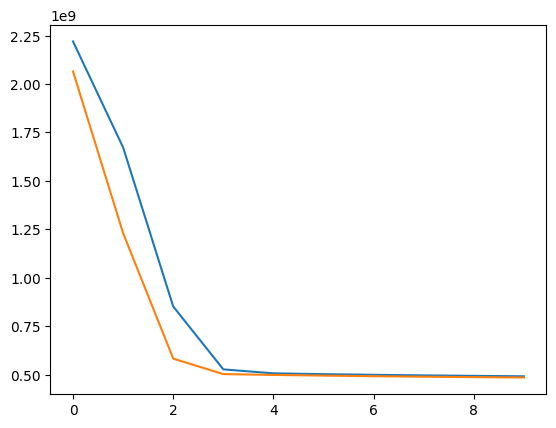

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()